# Car Price Prediction using ANN

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

In [2]:
drive.mount("/content/drive")
os.chdir("/content/drive/MyDrive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [3]:
df= pd.read_csv("Car_Prices_Poland_Kaggle.csv")
df

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...,...
117922,117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


In [4]:
df = df.iloc[:,1:]
df

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...
117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


In [5]:
df.isnull().sum()

mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [6]:
print("[INFO] Percentage of null values in a particular column")
df[df.columns[df.isnull().sum()>0]].isnull().sum()/df.shape[0]*100

[INFO] Percentage of null values in a particular column


generation_name    25.511545
dtype: float64

In [7]:
df.describe()

,year,mileage,vol_engine,price
count,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,5.690135,9.236936e+04,643.613438,8.482458e+04
min,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [8]:
df.describe(include = "object")

,mark,model,generation_name,fuel,city,province
count,117927,117927,87842,117927,117927,117927
unique,23,328,364,6,4427,23
top,audi,astra,gen-8p-2003-2012,Gasoline,Warszawa,Mazowieckie
freq,12031,3331,1567,61597,7972,22219


In [9]:
df.drop("generation_name", axis = 1, inplace = True)
df

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...
117922,volvo,xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,volvo,xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,volvo,xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,volvo,xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


## Bivariate Analysis

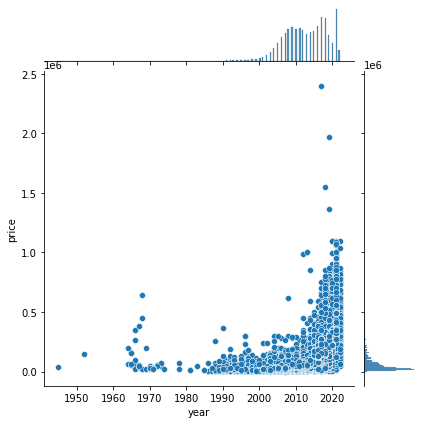

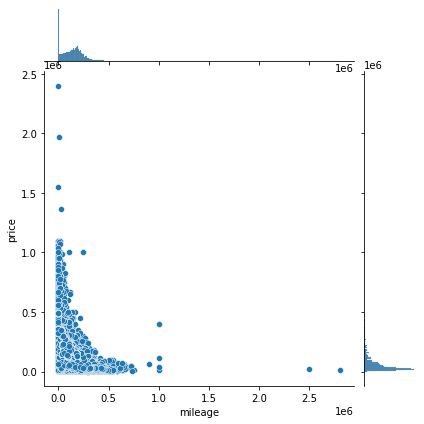

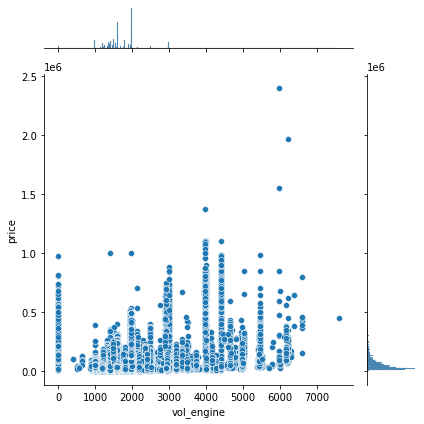

In [10]:
for i in df.select_dtypes("number").drop("price", axis = 1).columns:
    sns.jointplot(x = df[i], y = df.price, palette = "viridis")
plt.tight_layout()
plt.show()

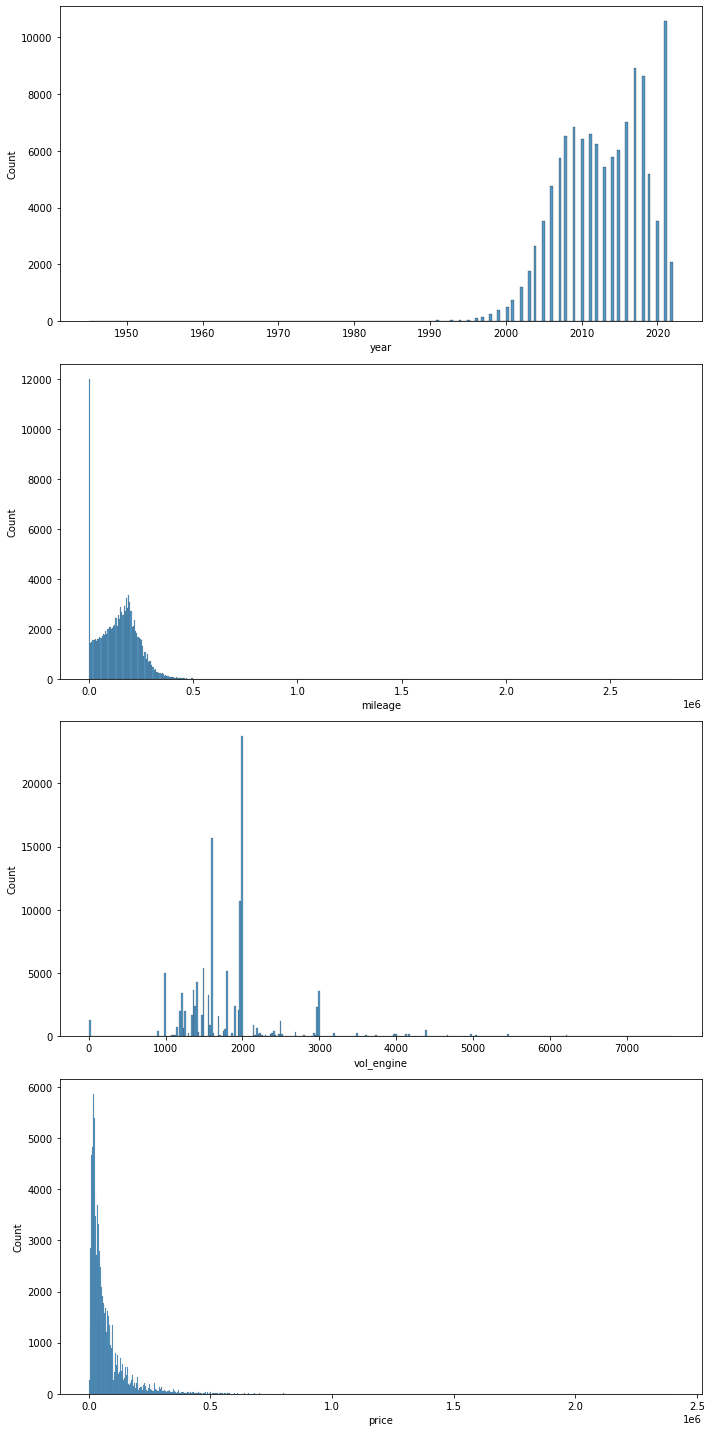

In [11]:
fig, ax = plt.subplots(nrows= 4, ncols = 1, figsize = (10,20))
for i,j in zip(df.select_dtypes(include = "number").columns, ax.flatten()):
    sns.histplot(df[i], ax = j)
plt.tight_layout()
plt.show()

In [12]:
new_df = df[df["year"]>1990]
new_df = new_df[new_df["mileage"]<400000]
new_df = new_df.loc[(new_df["vol_engine"]<=3000) & (new_df["vol_engine"]>=1000)]
new_df

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...
117922,volvo,xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,volvo,xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,volvo,xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,volvo,xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


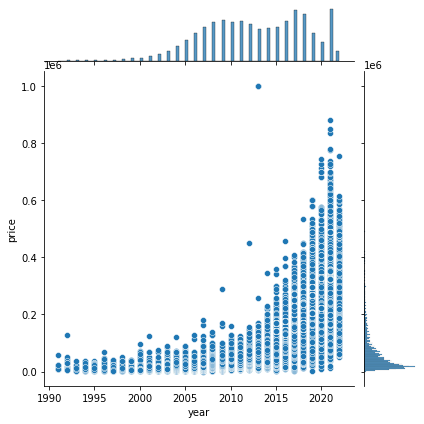

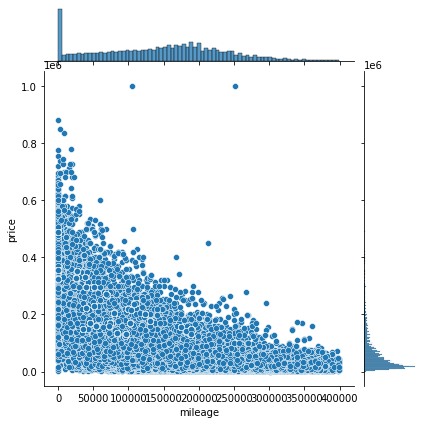

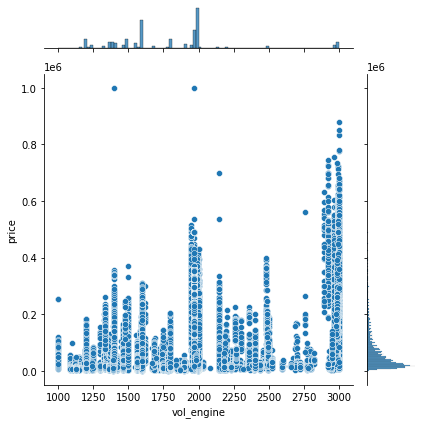

In [13]:
for i in df.select_dtypes("number").drop("price", axis = 1).columns:
    sns.jointplot(x = new_df[i], y = new_df.price, palette = "viridis")
plt.tight_layout()
plt.show()

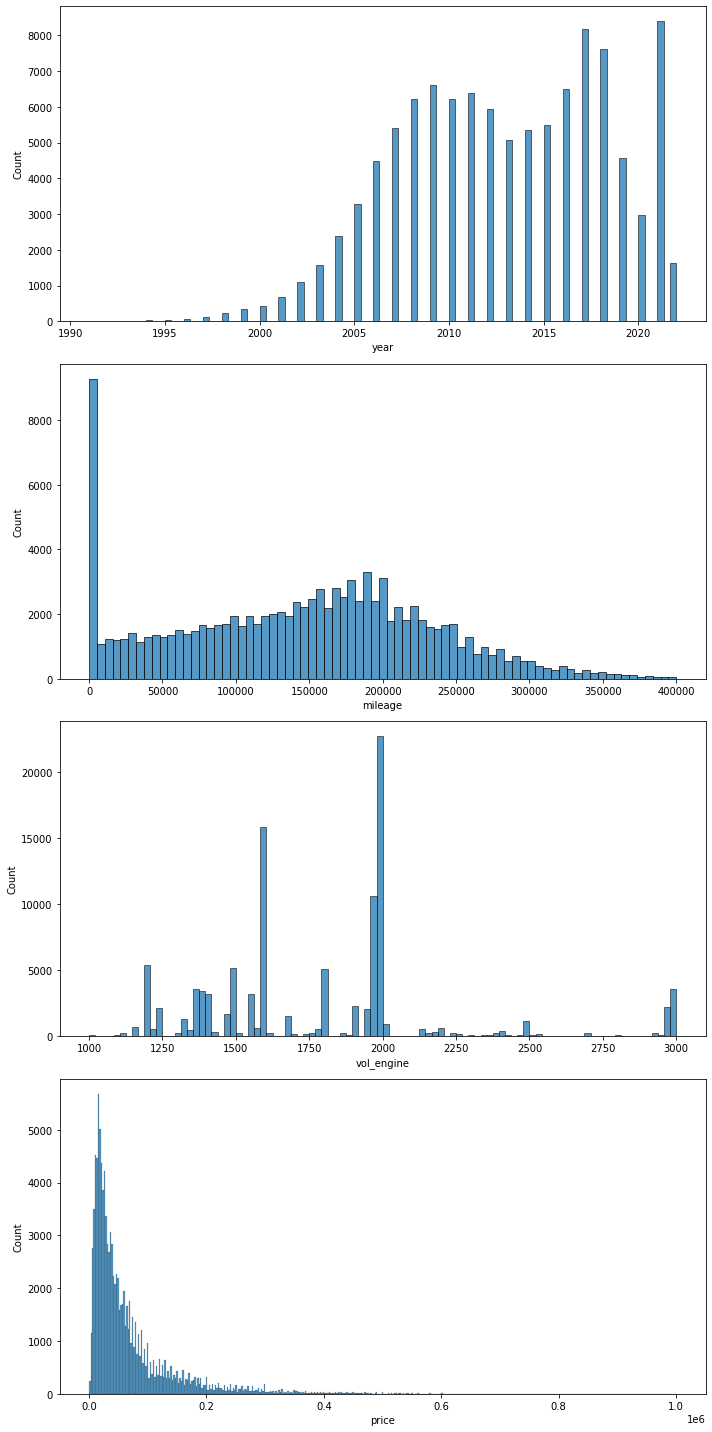

In [14]:
fig, ax = plt.subplots(nrows= 4, ncols = 1, figsize = (10,20))
for i,j in zip(new_df.select_dtypes(include = "number").columns, ax.flatten()):
    sns.histplot(new_df[i], ax = j)
plt.tight_layout()
plt.show()

In [15]:
new_df.describe(include = "object")

,mark,model,fuel,city,province
count,107453,107453,107453,107453,107453
unique,23,316,6,4288,23
top,opel,astra,Gasoline,Warszawa,Mazowieckie
freq,11551,3301,53757,7031,20258


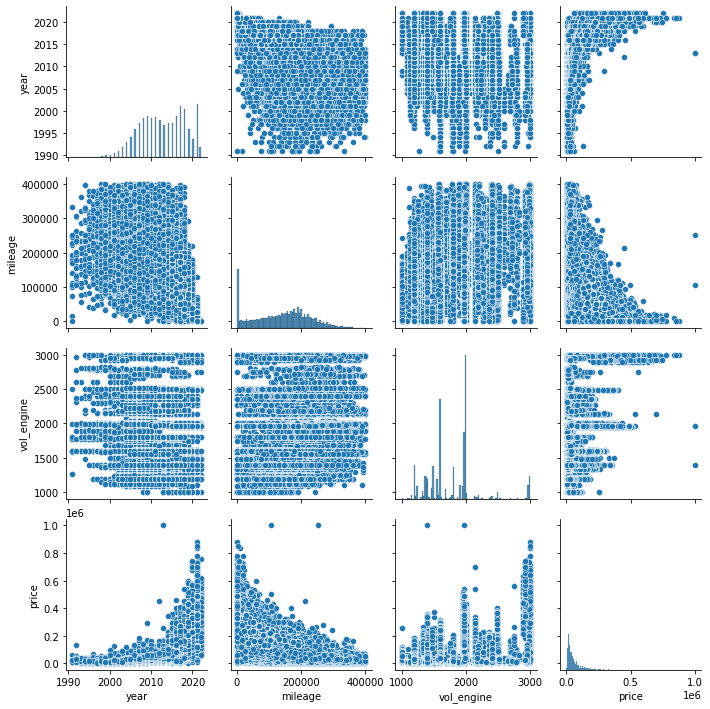

In [16]:
sns.pairplot(new_df)
plt.show()

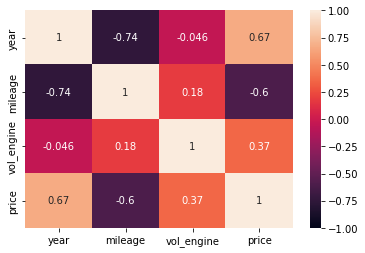

In [17]:
sns.heatmap(new_df.corr(), vmin = -1, vmax = 1, annot = True)
plt.show()

## Data pre-processing and Model Building

In [18]:
final_df = new_df.copy(deep = True)
le = LabelEncoder()
for i in final_df.select_dtypes("object").columns:
    final_df[i] = le.fit_transform(final_df[i])
final_df

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,15,88,2015,139568,1248,1,1120,6,35900
1,15,88,2018,31991,1499,1,1318,21,78501
2,15,88,2015,278437,1598,1,293,11,27000
3,15,88,2016,47600,1248,1,1457,11,30800
4,15,88,2014,103000,1400,0,3497,21,35900
...,...,...,...,...,...,...,...,...,...
117922,22,310,2020,40000,1969,4,1318,21,222790
117923,22,310,2017,51000,1969,1,405,20,229900
117924,22,310,2016,83500,1969,3,2685,14,135000
117925,22,310,2017,174000,1969,1,1259,18,154500


In [19]:
x = final_df.drop("price", axis = 1)
y = final_df.price
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.2)

In [20]:
model_list = [LinearRegression(), SGDRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), BaggingRegressor(), AdaBoostRegressor(), XGBRegressor(), SVR(), KNeighborsRegressor()]
eval = {"Model Name": [], "RMSE Score": [], "MAE Score": [], "R-Squared": []}
eval_df = pd.DataFrame(eval)
for i in model_list:
    model = i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    y_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    y_r2 = r2_score(y_test, y_pred)
    y_mae = mean_absolute_error(y_test, y_pred)
    pred_df = pd.DataFrame({"Model Name": [str(i)], "RMSE Score": [y_rmse], "MAE Score": [y_mae], "R-Squared": [y_r2]})
    eval_df = eval_df.append(pred_df)
eval_df

[20:55:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model Name,RMSE Score,MAE Score,R-Squared
0,LinearRegression(),4.426114e+04,2.880210e+04,6.668539e-01
0,SGDRegressor(),1.487891e+18,1.271454e+18,-3.764713e+26
0,DecisionTreeRegressor(),2.194853e+04,9.924247e+03,9.180780e-01
0,RandomForestRegressor(),1.801516e+04,7.951835e+03,9.448093e-01
0,BaggingRegressor(),1.852905e+04,8.327879e+03,9.416157e-01
0,AdaBoostRegressor(),3.851280e+04,2.798203e+04,7.477683e-01
0,XGBRegressor(),2.438088e+04,1.293178e+04,8.989146e-01
0,SVR(),7.540707e+04,4.073649e+04,3.302864e-02
0,KNeighborsRegressor(),3.732520e+04,2.311078e+04,7.630844e-01


In [21]:
pd.options.display.float_format = '{:.2f}'.format

In [22]:
eval_df = eval_df.reset_index(drop= True)
eval_df

,Model Name,RMSE Score,MAE Score,R-Squared
0,LinearRegression(),44261.14,28802.10,0.67
1,SGDRegressor(),1487891308845404928.00,1271454434006490112.00,-376471274325007896676401152.00
2,DecisionTreeRegressor(),21948.53,9924.25,0.92
3,RandomForestRegressor(),18015.16,7951.83,0.94
4,BaggingRegressor(),18529.05,8327.88,0.94
5,AdaBoostRegressor(),38512.80,27982.03,0.75
6,XGBRegressor(),24380.88,12931.78,0.90
7,SVR(),75407.07,40736.49,0.03
8,KNeighborsRegressor(),37325.20,23110.78,0.76


In [66]:
model = Sequential()
model.add(Dense(units = 256, activation= "relu", input_shape = (8,), kernel_initializer = "uniform"))
model.add(Dense(units = 256, activation= "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 128, activation= "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 128, activation= "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 64, activation= "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 64, activation= "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 64, activation= "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 8, activation= "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 8, activation= "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 1, activation= "relu", input_shape = (8,), kernel_initializer = "uniform"))

In [67]:
model.compile(loss = "mean_absolute_error", metrics= ["MeanAbsoluteError"], optimizer = SGD())

In [68]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 256)               2304      
                                                                 
 dense_82 (Dense)            (None, 256)               65792     
                                                                 
 dense_83 (Dense)            (None, 128)               32896     
                                                                 
 dense_84 (Dense)            (None, 128)               16512     
                                                                 
 dense_85 (Dense)            (None, 64)                8256      
                                                                 
 dense_86 (Dense)            (None, 64)                4160      
                                                                 
 dense_87 (Dense)            (None, 64)               

In [69]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 512, epochs = 500)

Epoch 1/500
168/168 [==============================] - 2s 7ms/step - loss: 77468.9922 - mean_absolute_error: 77468.9922 - val_loss: 67069.8281 - val_mean_absolute_error: 67069.8281
Epoch 2/500
168/168 [==============================] - 1s 6ms/step - loss: 66665.2734 - mean_absolute_error: 66665.2734 - val_loss: 67069.8281 - val_mean_absolute_error: 67069.8281
Epoch 3/500
168/168 [==============================] - 1s 6ms/step - loss: 66665.2656 - mean_absolute_error: 66665.2656 - val_loss: 67069.8281 - val_mean_absolute_error: 67069.8281
Epoch 4/500
168/168 [==============================] - 1s 6ms/step - loss: 66665.2891 - mean_absolute_error: 66665.2891 - val_loss: 67069.8281 - val_mean_absolute_error: 67069.8281
Epoch 5/500
168/168 [==============================] - 1s 6ms/step - loss: 66665.2656 - mean_absolute_error: 66665.2656 - val_loss: 67069.8281 - val_mean_absolute_error: 67069.8281
Epoch 6/500
168/168 [==============================] - 1s 6ms/step - loss: 66665.2891 - mean_ab

In [65]:
y_pred = model.predict(x_test)
y_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
y_r2 = r2_score(y_test, y_pred)
y_mae = mean_absolute_error(y_test, y_pred)
pred_df = pd.DataFrame({"Model Name": ["ANN()"], "RMSE Score": [y_rmse], "MAE Score": [y_mae], "R-Squared": [y_r2]})
eval_df = eval_df.append(pred_df)
eval_df

,Model Name,RMSE Score,MAE Score,R-Squared
0,LinearRegression(),44261.14,28802.10,0.67
1,SGDRegressor(),1487891308845404928.00,1271454434006490112.00,-376471274325007896676401152.00
2,DecisionTreeRegressor(),21948.53,9924.25,0.92
3,RandomForestRegressor(),18015.16,7951.83,0.94
4,BaggingRegressor(),18529.05,8327.88,0.94
5,AdaBoostRegressor(),38512.80,27982.03,0.75
6,XGBRegressor(),24380.88,12931.78,0.90
7,SVR(),75407.07,40736.49,0.03
8,KNeighborsRegressor(),37325.20,23110.78,0.76
0,ANN(),101876.45,67069.83,-0.76
